

---
# Init


---



Team : Minus One

members :

Narasimhan N( MT2022062)

Sreenidhi K R ( MT2022115)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns 
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [ ]:
dev_mode = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# traindf = pd.read_csv('/Users/sreenidhikr/Development/pubg-version-3/train_up.csv')
traindf = pd.read_csv('/content/drive/MyDrive/pubg/train_up.csv')

if(dev_mode):
  df = traindf.head(2100000)
  testdf = traindf.tail(1012876)
  
else :
  df = traindf.copy()
  # testdf = pd.read_csv('/Users/sreenidhikr/Development/pubg-version-3/test_up.csv')
  testdf = pd.read_csv('/content/drive/MyDrive/pubg/test_up.csv')



In [ ]:
# To Expand columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

#ignore warnings
pd.options.mode.chained_assignment = None 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-20-a86a97bf760e>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
print(traindf.shape)
print(df.shape)
print(testdf.shape)

(3112876, 29)
(3112876, 29)
(1334090, 28)


Presetting the datatypes
Python automatically reads the data type, which causes a lot of memory waste. So if we know in advance the memory we will set up, we can use it much more effectively.

iterate through all the columns of a dataframe and modify the data type to reduce memory usage.

Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [ ]:
# def reduceMemory(df):
#     import numpy as np

#     for col in df.columns:
#         col_type = df[col].dtype

#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)

#     return df
# df = reduceMemory(df)

In [ ]:
#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
#! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu; 

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Found Boost: /usr/include (found suitable version "1.65.1", minimum required is "1.56.0") found components: filesystem system 
-- Performing Test MM_PREFET

In [ ]:
# After running
#! git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 28146, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 28146 (delta 79), reused 159 (delta 70), pack-reused 27962
Receiving objects: 100% (28146/28146), 19.92 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (20793/20793), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Comp



---

# Initial Observations

---



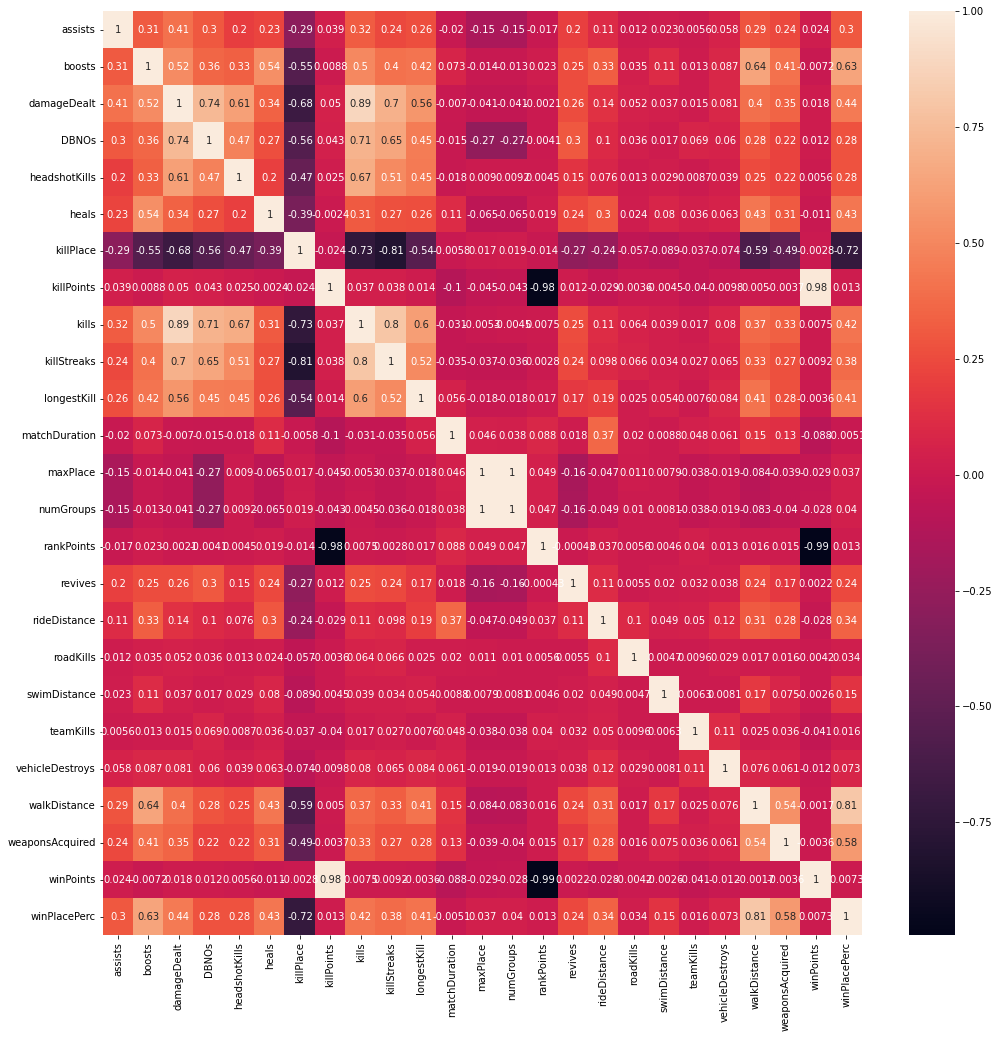

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.corr()['winPlacePerc'].sort_values()

killPlace         -0.719009
matchDuration     -0.005130
winPoints          0.007265
killPoints         0.013171
rankPoints         0.013321
teamKills          0.015535
roadKills          0.034090
maxPlace           0.037429
numGroups          0.039714
vehicleDestroys    0.073495
swimDistance       0.149715
revives            0.241043
headshotKills      0.277494
DBNOs              0.280254
assists            0.299125
rideDistance       0.342521
killStreaks        0.377600
longestKill        0.409985
kills              0.419801
heals              0.427901
damageDealt        0.440601
weaponsAcquired    0.582801
boosts             0.634121
walkDistance       0.810920
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

based on knn

In [ ]:
samp = df.sample(300000)
samp.dropna(inplace = True)
mutual_info = mutual_info_regression(samp.drop(columns =['winPlacePerc','matchType','matchId','Id','groupId'],axis=1),samp.winPlacePerc)
mutual_info =  pd.Series(mutual_info)
mutual_info.index = samp.drop(columns =['winPlacePerc','matchType','matchId','Id','groupId'],axis=1).columns
mutual_info = mutual_info.sort_values(ascending=False)

print(mutual_info)

maxPlace           2.378594
numGroups          1.181999
killPlace          0.948081
walkDistance       0.733891
weaponsAcquired    0.326114
boosts             0.322689
heals              0.203367
damageDealt        0.162876
longestKill        0.144017
kills              0.128810
rideDistance       0.120961
DBNOs              0.112352
killStreaks        0.099580
assists            0.066635
rankPoints         0.061645
revives            0.053547
headshotKills      0.051120
matchDuration      0.044275
swimDistance       0.032904
winPoints          0.022494
killPoints         0.018551
vehicleDestroys    0.004675
teamKills          0.003511
roadKills          0.000430
dtype: float64




---

# Preprocessing on Rows

---



In [ ]:
df.dropna(inplace=True)

Possibility of Hacker:

1) Walk distance = 0 but kills are very high

2) Walk distance = 0 but weapons acquired are high

3) Walk disance  = 0 but damageDelt are high

4) Walk distance = 0 but DBNO are high

5) Walk distance = 0 but assist are high

6) When Walk distance =0 but Ride distance > 0

7) Walk distance = 0 and Heals/Boosts > 0 :


8) Very long kills

9) Very high Headshots

***Think weather to drop the rows or set the win percentage of these to 0*** ❓❓❓❓❓

---



In [ ]:
drop_rows = list(df[ (df['walkDistance']==0) & (
    (df['kills']>0) | (df['weaponsAcquired']>0) | (df['damageDealt']>0)| (df['rideDistance']>0) | (df['DBNOs']>0) | 
    (df['assists']>0) | (df['heals']>0) | (df['boosts']>0)) ].index )

print("Number of Hackers where walk distance is = 0 but (kills , damanage , dealth ,...etc) > 0 is ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Number of Hackers where walk distance is = 0 but (kills , damanage , dealth ,...etc) > 0 is  14681


In [ ]:
drop_rows = list(df[(df['winPlacePerc']==0) & ((df['kills']>1) | (df['walkDistance']>1000) | (df['assists']>1))].index)
print("Number of Hackers  winPlacePerc = 0 but (kills , assists) > 1",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Number of Hackers  winPlacePerc = 0 but (kills , assists) > 1 2522


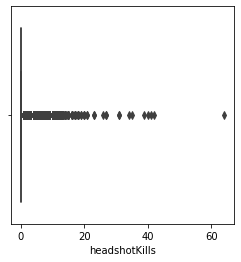

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['headshotKills'])

In [ ]:
drop_rows = list(df[df['headshotKills']>20].index)
print("Number of Hackers where headshots are very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Number of Hackers where headshots are very high :  16


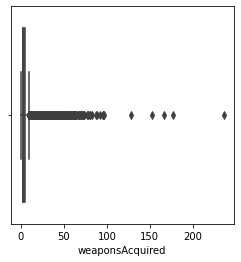

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['weaponsAcquired'])

In [ ]:
drop_rows = list(df[df['weaponsAcquired']>50].index)
print("Number of Hackers where weaponsAcquired are very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Number of Hackers where weaponsAcquired are very high :  100


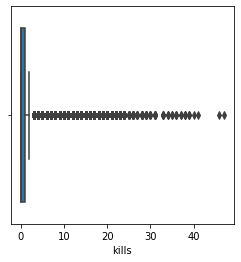

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['kills'])

In [ ]:
drop_rows = list(df[df['kills']>30].index)
print("Number of Hackers where kills are very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Number of Hackers where kills are very high :  32


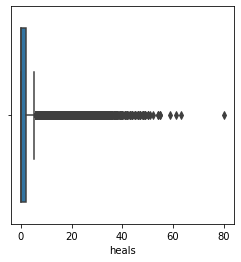

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['heals'])

In [ ]:
drop_rows = list(df[(df['heals']>35) | (df['boosts']>35)].index)
print("boosts / heals are very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

boosts / heals are very high :  195


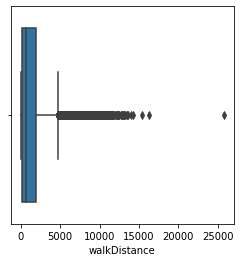

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['walkDistance'])

In [ ]:
drop_rows = list(df[df['walkDistance']>10000].index)
print("Walk distance very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Walk distance very high :  155


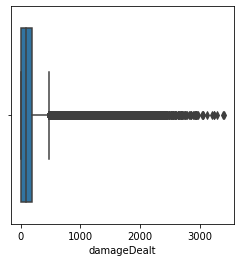

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x=df['damageDealt'])

In [ ]:
drop_rows = list(df[df['damageDealt']>1500].index)
print("Walk distance very high : ",len(drop_rows))
df.drop(index=drop_rows,inplace=True)

Walk distance very high :  1479


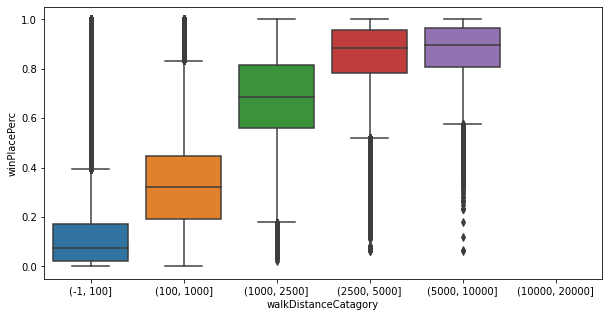

In [ ]:
fig = plt.figure(figsize=(10,5))
df_temp = df.copy()
df_temp['walkDistanceCatagory'] = pd.cut(df_temp['walkDistance'],[-1,100,1000,2500,5000,10000,20000])
sns.boxplot(x=df_temp['walkDistanceCatagory'],y=df_temp['winPlacePerc'])

In [ ]:
drop_index = list(df[(df['walkDistance']<=200) & (df['winPlacePerc']>=0.9)].index)
print("Dropping Rows where the walkDistance is < 100m but have winPlacePercentage >= 90% : ",len(drop_index))
df.drop(index=drop_index,inplace=True)

Dropping Rows where the walkDistance is < 100m but have winPlacePercentage >= 90% :  3892


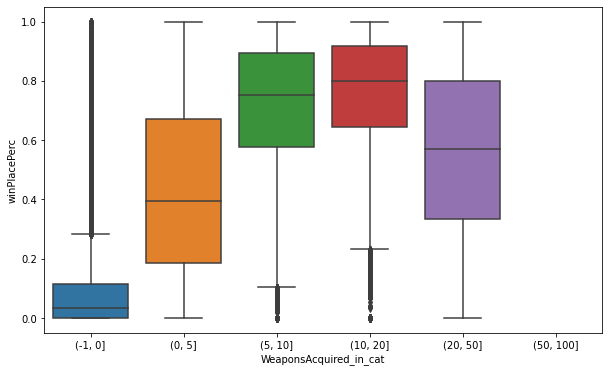

In [ ]:
fig = plt.figure(figsize=(10,6))
temp_df = df.copy()
temp_df['WeaponsAcquired_in_cat'] = pd.cut(temp_df['weaponsAcquired'],[-1,0,5,10,20,50,100])
sns.boxplot(x=temp_df['WeaponsAcquired_in_cat'],y=df['winPlacePerc'])

In [ ]:
drop_index = list(df[(df['weaponsAcquired']==0) & (df['winPlacePerc']>=0.5)].index)
print("Dropping Rows where the walkDistance is < 100m but have winPlacePercentage >= 50% : ",len(drop_index))
df.drop(index=drop_index,inplace=True)

Dropping Rows where the walkDistance is < 100m but have winPlacePercentage >= 50% :  5227


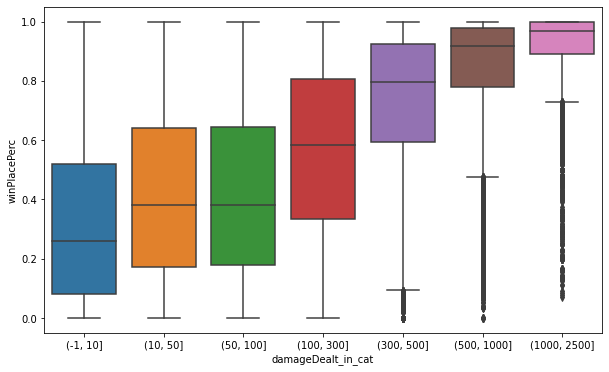

In [ ]:
fig = plt.figure(figsize=(10,6))
temp_df = df.copy()
temp_df['damageDealt_in_cat'] = pd.cut(temp_df['damageDealt'],[-1,10,50,100,300,500,1000,2500])
sns.boxplot(x=temp_df['damageDealt_in_cat'],y=df['winPlacePerc'])

In [ ]:
drop_index = list(df[(df['damageDealt']>=500) & (df['winPlacePerc']<=0.3)].index)
print("Dropping Rows where the damageDealt is > 500 but have winPlacePercentage <= 30% : ",len(drop_index))
df.drop(index=drop_index,inplace=True)

Dropping Rows where the damageDealt is > 500 but have winPlacePercentage <= 30% :  1736




---

# Preprocessing Columns and Feature Engineering

---



In [ ]:
def preprocess(df,train=1):

  df['walkDistancePerMatchDuration'] = df['walkDistance'] / df['matchDuration'] * 100;
  df['weaponsAcquiredPerWalkDistance'] = df['weaponsAcquired'] / (df['walkDistance'] + 0.1) * 100;
  df['killsPerWalkDistance'] = df['kills'] / (df['walkDistance'] + 0.1) * 100;
  df['damageDeltPerWalkDistance'] = df['damageDealt'] / (df['walkDistance'] + 0.1) * 100;
  df['boostsPerWalkDistance'] = df['boosts'] / (df['walkDistance'] + 0.1) * 100;
  df['killPlacePerMaxPlace'] = df['killPlace']/(df['maxPlace']+1) * 100;
  df['killPlacePerNumGroups'] = df['killPlace'] / (df['numGroups'] + 1)* 100;

  #Tried these new feature not including them since they were not useful
  #df['healsandboosts'] = df['heals'] + df['boosts']
  #test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']


  #deleting not so useful columns
  drop_columns = ['matchId','rankPoints', 'winPoints','killPoints','teamKills','vehicleDestroys','roadKills','swimDistance']
  if(train):
    drop_columns.append('Id')
  df.drop(columns= drop_columns , inplace = True)
  return df


In [ ]:
df = preprocess(df)

In [ ]:
samp = df.sample(200000)
samp.dropna(inplace = True)
mutual_info = mutual_info_regression(samp.drop(columns =['winPlacePerc','matchType','groupId'],axis=1),samp.winPlacePerc)
mutual_info =  pd.Series(mutual_info)
mutual_info.index = samp.drop(columns =['winPlacePerc','matchType','groupId'],axis=1).columns
mutual_info = mutual_info.sort_values(ascending=False)

print(mutual_info)


killPlacePerMaxPlace              2.499106
maxPlace                          2.367130
killPlacePerNumGroups             1.493418
numGroups                         1.164521
killPlace                         0.946137
walkDistancePerMatchDuration      0.782216
walkDistance                      0.740667
weaponsAcquiredPerWalkDistance    0.495817
weaponsAcquired                   0.337588
boosts                            0.325896
boostsPerWalkDistance             0.314652
damageDeltPerWalkDistance         0.266982
killsPerWalkDistance              0.245184
heals                             0.204364
damageDealt                       0.164618
longestKill                       0.147006
kills                             0.133237
rideDistance                      0.121718
DBNOs                             0.116329
killStreaks                       0.103425
assists                           0.069702
revives                           0.053941
headshotKills                     0.048042
matchDurati

In [ ]:
df.corr()['winPlacePerc'].sort_values()

killPlace                        -0.725854
killPlacePerNumGroups            -0.609368
killPlacePerMaxPlace             -0.608327
weaponsAcquiredPerWalkDistance   -0.131156
damageDeltPerWalkDistance        -0.116204
killsPerWalkDistance             -0.060709
matchDuration                    -0.004906
maxPlace                          0.039723
numGroups                         0.041075
boostsPerWalkDistance             0.141908
revives                           0.242088
headshotKills                     0.285420
DBNOs                             0.286784
assists                           0.305092
rideDistance                      0.344488
killStreaks                       0.381216
longestKill                       0.413464
heals                             0.432353
kills                             0.434179
damageDealt                       0.456147
weaponsAcquired                   0.614288
boosts                            0.637994
walkDistance                      0.817985
walkDistanc



---

# Grouping

---



***Intuition behind grouping teammates in squad and duo***

Since PUBG is mostly a group game (except in solo) the ranking of a player depends on the ranking of the other players in the group 

for example even if a player in a group gets out ealry , where as his team-mates go on to win the match , the player who got out early still gets 1st place 

so if we make predictions just by seeing a player , it will lead to many inaccuarcies , therefore we group the data based on group id 
and collectively judge the groups performence

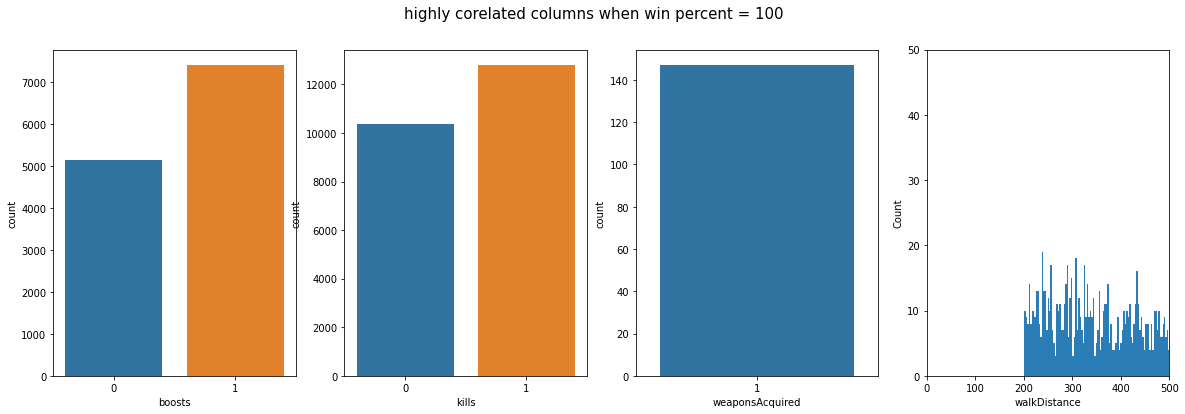

In [ ]:
fig, ax =plt.subplots(1,4)
fig.set_figheight(6)
fig.set_figwidth(20)

fig.suptitle("highly corelated columns when win percent = 100",fontsize=15)
sns.countplot(data=df[(df['winPlacePerc'] == 1) & (df['boosts'] <2)], x="boosts",ax=ax[0])

sns.countplot(data=df[(df['winPlacePerc'] == 1) & (df['kills'] <2)], x="kills",ax=ax[1])

sns.countplot(data=df[(df['winPlacePerc'] == 1) & (df['weaponsAcquired'] <2)], x="weaponsAcquired",ax=ax[2])


sns.histplot(data=df[df['winPlacePerc'] == 1], x="walkDistance",ax=ax[3],binwidth=3)
sns.histplot(data=df[df['winPlacePerc'] == 1], x="walkDistance",ax=ax[3],binwidth=3)
ax[3].set_xlim([0, 500])
ax[3].set_ylim([0, 50])
# plt.tight_layout()
fig.show()


*It can be seen that even with 0 boosts , 0 kills , 0 weapons, 0 walk distance the win percentage is 100,this implies that there team mates have performed well and won the match*

In [ ]:
group_by_columns = {
                     'winPlacePerc' : 'max',                    
                     'killStreaks': 'max',   
                     'longestKill': 'max',      
                     'walkDistancePerMatchDuration': ['sum','mean','min','max'],
                     'weaponsAcquiredPerWalkDistance': ['sum','mean','min','max'],
                     'killsPerWalkDistance': ['sum','mean','min','max'], 
                     'damageDeltPerWalkDistance': ['sum','mean','min','max'], 
                     'rideDistance': ['sum'], 
                     'DBNOs':['sum'],
                     'assists':['sum'],
                     'numGroups' :'first',
                     'maxPlace' :'first',
                     'damageDealt':['sum','mean','min','max'],
                     'revives' : ['sum'],
                     'headshotKills' :['sum'],
                     'kills' :['sum','mean','min','max'],
                     'weaponsAcquired':['sum','mean','min','max'],
                     'boosts':['sum','mean','min','max'],
                     'heals':['sum','mean','min','max'],
                     'matchDuration':'first',
                     'walkDistance' : ['sum','mean','min','max'],
                     'killPlace' : ['sum','mean','min','max'],
                     'killPlacePerMaxPlace':['sum','mean','min','max'],
                     'killPlacePerNumGroups':['sum','mean','min','max'],
                                           }
group_by_columns_test = group_by_columns.copy();
group_by_columns_test['Id'] = 'first'
if(not dev_mode):
  group_by_columns_test.pop('winPlacePerc')

In [ ]:
squad_df_ug = df[(df['matchType'] =='squad-fpp') | (df['matchType']=='squad') | (df['matchType']=='normal-squad-fpp') | (df['matchType']=='normal-squad')]
duo_df_ug = df[(df['matchType']=='duo-fpp') | (df['matchType']=='duo')| (df['matchType']=='normal-duo-fpp')| (df['matchType']=='normal-duo')]
solo_df_ug = df[(df['matchType']=='solo-fpp') | (df['matchType']=='solo') | (df['matchType']=='normal-solo') |(df['matchType']=='normal-solo-fpp')]

In [ ]:
squad_df = squad_df_ug.groupby('groupId').agg(group_by_columns)
duo_df = duo_df_ug.groupby('groupId').agg(group_by_columns)     
solo_df = solo_df_ug.drop(columns = ['matchType','groupId'])        

In [ ]:
squad_df.rename(columns='_'.join, inplace=True)
squad_df.columns = squad_df.columns.map('_'.join)

duo_df.rename(columns='_'.join, inplace=True)
duo_df.columns = duo_df.columns.map('_'.join)

squad_df.columns = squad_df.columns.str.replace('_', '')
duo_df.columns = duo_df.columns.str.replace('_', '')

duo_df.rename(columns = {'winPlacePercmax':'winPlacePerc'}, inplace = True)
squad_df.rename(columns = {'winPlacePercmax':'winPlacePerc'}, inplace = True)

In [ ]:
squad_df.sort_index(axis=1, inplace=True)
duo_df.sort_index(axis=1, inplace=True)
solo_df.sort_index(axis=1, inplace=True)

In [ ]:
samp = squad_df.sample(200000)
samp.dropna(inplace = True)
mutual_info = mutual_info_regression(samp.drop(columns =['winPlacePerc'],axis=1),samp.winPlacePerc)
mutual_info =  pd.Series(mutual_info)
mutual_info.index = samp.drop(columns =['winPlacePerc'],axis=1).columns
mutual_info = mutual_info.sort_values(ascending=False)

print(mutual_info)


killPlacePerMaxPlacemax               2.413984
killPlacePerMaxPlacemin               2.040084
maxPlacefirst                         1.687704
killPlacePerMaxPlacemean              1.555259
killPlacePerNumGroupsmax              1.483027
killPlacePerMaxPlacesum               1.413369
killPlacePerNumGroupsmin              1.099005
killPlacemax                          0.993555
killPlacePerNumGroupsmean             0.854838
walkDistancePerMatchDurationmean      0.825030
walkDistancePerMatchDurationmax       0.787785
walkDistancemean                      0.771347
walkDistancemax                       0.733713
walkDistancePerMatchDurationmin       0.669792
numGroupsfirst                        0.661922
killPlacePerNumGroupssum              0.649288
walkDistancemin                       0.638455
killPlacemean                         0.626557
killPlacemin                          0.621639
walkDistancePerMatchDurationsum       0.545394
walkDistancesum                       0.519575
weaponsAcquir

In [ ]:
samp = solo_df.sample(200000)
samp.dropna(inplace = True)
mutual_info = mutual_info_regression(samp.drop(columns =['winPlacePerc'],axis=1),samp.winPlacePerc)
mutual_info =  pd.Series(mutual_info)
mutual_info.index = samp.drop(columns =['winPlacePerc'],axis=1).columns
mutual_info = mutual_info.sort_values(ascending=False)

print(mutual_info)

killPlacePerMaxPlace              2.972752
maxPlace                          2.201047
killPlacePerNumGroups             1.677426
killPlace                         1.296133
walkDistancePerMatchDuration      0.981246
walkDistance                      0.910917
weaponsAcquiredPerWalkDistance    0.608609
numGroups                         0.556885
weaponsAcquired                   0.421503
boosts                            0.360736
boostsPerWalkDistance             0.337862
killsPerWalkDistance              0.320804
damageDeltPerWalkDistance         0.319609
damageDealt                       0.214065
kills                             0.196304
heals                             0.189696
longestKill                       0.189211
killStreaks                       0.129265
rideDistance                      0.109174
headshotKills                     0.086962
assists                           0.016790
DBNOs                             0.001607
matchDuration                     0.000000
revives    



---
# EDA


---



In [ ]:
def plotLine(attribute):
  f,ax = plt.subplots(figsize = (10,4))
  sns.lineplot(x = attribute , y = 'winPlacePerc',data = solo_df,color='red',alpha=0.8,ci=None,label='solo');
  sns.lineplot(x = (attribute+'min') , y = 'winPlacePerc',data = duo_df,color='blue',alpha=0.8,ci=None,label='duo');
  sns.lineplot(x = (attribute+'min') , y = 'winPlacePerc',data = squad_df,color='green',alpha=0.8,ci=None,label='squad');
  plt.xlabel(attribute);
  plt.ylabel('Win Percentage');
  plt.title(attribute,fontsize = 15,color = 'blue')
  plt.grid()

**🐛 🐞 🔴 todo - bugfix**

In [ ]:
def plotBox(attribute,intervals):
  fig, ax =plt.subplots(1,3)
  fig.set_figheight(5)
  fig.set_figwidth(15)
  fig.suptitle(attribute,fontsize=15)

  temp_df = solo_df_ug.copy()
  temp_df[attribute] = pd.cut(temp_df[attribute],intervals)
  sns.boxplot(x=temp_df[attribute],y=df['winPlacePerc'],ax=ax[2])


  temp_df = duo_df.copy()
  temp_df[attribute] = pd.cut(temp_df[attribute],intervals)
  sns.boxplot(x=temp_df[attribute],y=df['winPlacePerc'],ax=ax[1])

  temp_df = squad_df_ug.copy()
  temp_df[attribute] = pd.cut(temp_df[attribute],intervals)
  sns.boxplot(x=temp_df[attribute],y=df['winPlacePerc'],ax=ax[0])


  plt.tight_layout()
  fig.show()

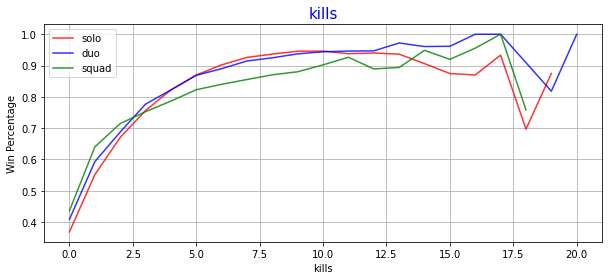

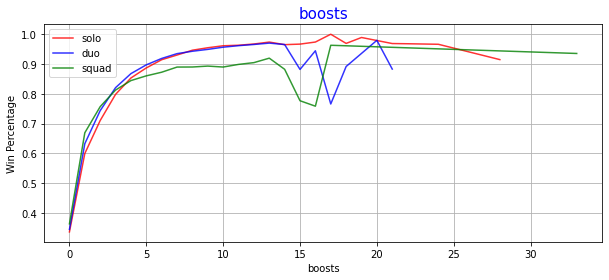

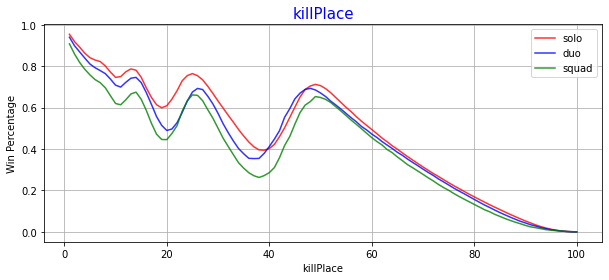

In [ ]:
line_plot_columns = ['kills','boosts','killPlace']
for c in line_plot_columns:
  plotLine(c)




---
# **TRAINING**
---



In [ ]:
def get_model_lgbm(df):
  y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
  X_train = df.drop(['winPlacePerc'], axis = 1)
  y_train = y_train.fillna(0)
  params = {"objective" : "regression", "metric" : "mae", 'n_estimators':2000, 
               "num_leaves" : 85, "learning_rate" : 0.05, 
              "bagging_fraction" : 0.7, "bagging_seed" : 0, "num_threads" : 4,
              "colsample_bytree" : 0.8,'device' : 'gpu',
             }
  
  model = LGBMRegressor(**params)
  model.fit(
      X_train, y_train
  )
  return model

In [ ]:
import xgboost as xgb

In [ ]:
def get_model_xg(df):
  y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
  X_train = df.drop(['winPlacePerc'], axis = 1)
  y_train = y_train.fillna(0)
  model = xgb.XGBRegressor(tree_method='gpu_hist',objective ='reg:squarederror', 
                           colsample_bytree = 0.6, learning_rate = 0.07,max_depth = 9, 
                           alpha = 10, n_estimators = 700)
  model.fit(
      X_train, y_train
  )
  return model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def get_model_lr(df):
  y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
  X_train = df.drop(['winPlacePerc'], axis = 1)
  y_train = y_train.fillna(0)
  model = LinearRegression(n_jobs=4, normalize=True)
  model.fit(X_train,y_train)
  return model

In [ ]:
from sklearn.svm import SVR

In [ ]:
def get_model_svm(df , k):
  y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
  X_train = df.drop(['winPlacePerc'], axis = 1)
  y_train = y_train.fillna(0)
  model = regressor = SVR(kernel=k)
  model.fit(X_train,y_train)
  return model

In [ ]:
model_solo = get_model_xg(solo_df)
model_duo = get_model_xg(duo_df)
model_squad = get_model_xg(squad_df)


In [ ]:
print('Feature importances:', model_squad.feature_importances_)

Feature importances: [0.00053961 0.00141083 0.00197113 0.00524637 0.00065432 0.00085186
 0.00065256 0.0006027  0.00049115 0.00060464 0.00040042 0.00051437
 0.00060862 0.00052966 0.00041061 0.00050358 0.00085942 0.00058049
 0.00060988 0.03102492 0.00108974 0.00442001 0.00452598 0.06808681
 0.01120003 0.00610733 0.00721758 0.04447981 0.01510926 0.00356595
 0.00277125 0.00125418 0.00138706 0.00435267 0.00700686 0.00175779
 0.00462859 0.00459271 0.0186839  0.00303203 0.00076405 0.0020919
 0.00157242 0.00112445 0.00101201 0.0031137  0.2739069  0.38685542
 0.00179703 0.00076741 0.01223019 0.04354714 0.00088498 0.0007335
 0.00055847 0.00065439 0.00075062 0.00057232 0.00067441 0.00087236
 0.00068089 0.00049889]




---


# **TESTING**

---





In [ ]:
testdf_grouped = testdf.copy()

testdf_grouped = preprocess(testdf_grouped,0)

squad_df_test = testdf_grouped[(testdf_grouped['matchType'] =='squad-fpp') | (testdf_grouped['matchType']=='squad') | (testdf_grouped['matchType']=='normal-squad-fpp') | (testdf_grouped['matchType']=='normal-squad')]
duo_df_test = testdf_grouped[(testdf_grouped['matchType']=='duo-fpp') | (testdf_grouped['matchType']=='duo')| (testdf_grouped['matchType']=='normal-duo-fpp')| (testdf_grouped['matchType']=='normal-duo')]
solo_df_test = testdf_grouped[(testdf_grouped['matchType']!='squad-fpp') & (testdf_grouped['matchType']!='squad')& (testdf_grouped['matchType']!='normal-duo')& (testdf_grouped['matchType']!='normal-duo-fpp') & (testdf_grouped['matchType']!='normal-squad-fpp') & (testdf_grouped['matchType']!='normal-squad')& (testdf_grouped['matchType']!='duo-fpp') & (testdf_grouped['matchType']!='duo')]



squad_df_test_grouped = squad_df_test.groupby('groupId',as_index=False).agg(group_by_columns_test)
duo_df_test_grouped  = duo_df_test.groupby('groupId',as_index=False).agg(group_by_columns_test)
solo_df_test_grouped = solo_df_test.drop(columns = ['matchType'])

#
sq_g = squad_df_test.drop(columns = ['matchType'])



squad_df_test.sort_index(axis=1, inplace=True)
duo_df_test.sort_index(axis=1, inplace=True)
solo_df_test.sort_index(axis=1, inplace=True)
squad_df_test_grouped.sort_index(axis=1, inplace=True)
duo_df_test_grouped.sort_index(axis=1, inplace=True)
solo_df_test_grouped.sort_index(axis=1, inplace=True)

#
sq_g.sort_index(axis=1, inplace=True)


squad_df_test_grouped.rename(columns='_'.join, inplace=True)
squad_df_test_grouped.columns = squad_df_test_grouped.columns.map('_'.join)

duo_df_test_grouped.rename(columns='_'.join, inplace=True)
duo_df_test_grouped.columns = duo_df_test_grouped.columns.map('_'.join)

squad_df_test_grouped.columns = squad_df_test_grouped.columns.str.replace('_', '')
duo_df_test_grouped.columns = duo_df_test_grouped.columns.str.replace('_', '')

duo_df_test_grouped.rename(columns = {'winPlacePercmax':'winPlacePerc' , 'Idfirst':'Id'}, inplace = True)
squad_df_test_grouped.rename(columns = {'winPlacePercmax':'winPlacePerc','Idfirst':'Id'}, inplace = True)


In [ ]:
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

In [ ]:
def predict_model(odf ,df, model , s = 1):
  id_gid = pd.DataFrame(odf,columns = ['Id','groupId'])
  if(dev_mode):
    y_test = pd.DataFrame(df,columns = ['winPlacePerc'])
    xtest = df.drop(columns = ['groupId' ,'Id', 'winPlacePerc'])
  else :
    xtest = df.drop(columns = ['groupId','Id'])
  xtest.sort_index(axis=1, inplace=True)
  predictions = model.predict(xtest)
  y_pred = pd.DataFrame(predictions, columns = ['winPlacePerc'])
  
  for i in range(len(y_pred)):
    if y_pred['winPlacePerc'].iloc[i] < 0 :
      y_pred['winPlacePerc'].iloc[i] = 0
    if y_pred['winPlacePerc'].iloc[i] > 1 :
      y_pred['winPlacePerc'].iloc[i] = 1

  if(dev_mode):
    print('The mean absolute error of prediction is:', metrics.mean_absolute_error(y_test, y_pred))  
  if(s == 0):
      odf_id = pd.DataFrame(odf,columns = ['Id'])
      odf_id.reset_index(drop=True, inplace=True)
      res = pd.concat([odf_id, y_pred], axis=1, join='inner' ,ignore_index=True, sort=False)
      res.rename(columns={0: 'Id', 1: 'winPlacePerc'}, inplace=True)
      return res

  gid_target = pd.concat([df['groupId'], y_pred], axis=1, join='inner' ,ignore_index=True, sort=False)
  gid_target.rename(columns={0: 'groupId', 1: 'winPlacePerc'}, inplace=True)
  result = id_gid.merge(gid_target, how='inner', on='groupId')
  result.drop(columns=['groupId'],inplace = True)
  return result
  


In [ ]:
result_solo = predict_model(solo_df_test_grouped ,solo_df_test_grouped, model_solo,0)

The mean absolute error of prediction is: 0.0423610555433123


In [ ]:
duo_df_test_grouped.replace([np.inf, -np.inf], np.nan, inplace=True)
squad_df_test_grouped.replace([np.inf, -np.inf], np.nan, inplace=True)
duo_df_test_grouped.fillna(0,inplace=True)
squad_df_test_grouped.fillna(0,inplace=True)



In [ ]:
result_duo = predict_model(duo_df_test ,duo_df_test_grouped, model_duo)

The mean absolute error of prediction is: 0.04693529689057275


In [ ]:
result_squad = predict_model(squad_df_test,squad_df_test_grouped , model_squad)

The mean absolute error of prediction is: 0.06341065474921555


In [ ]:
#0.6330

In [ ]:
if(not dev_mode):
  result = pd.concat([result_squad, result_duo, result_solo])
  result.fillna(0.5,inplace = True)
  result.to_csv('submissionV94.csv', header=True , index = False)



# Ungrouped Benchmark

In [ ]:
ungrouped_df = df.drop(columns = ['matchType','groupId'])  
ungrouped_df.sort_index(axis=1, inplace=True)

In [ ]:
model_ungrouped = get_model_lgbm(ungrouped_df)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3527
[LightGBM] [Info] Number of data points in the train set: 2079544, number of used features: 24
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (39.66 MB) transferred to GPU in 0.068726 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.474267


In [ ]:
test_ungrouped = testdf_grouped.drop(columns = ['matchType'])
test_ungrouped.sort_index(axis=1, inplace=True)

In [ ]:
result_ungrouped = predict_model(test_ungrouped ,test_ungrouped, model_ungrouped,0)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
The mean absolute error of prediction is: 0.05738620868328145


In [ ]:
r1 = predict_model(sq_g ,sq_g, model_ungrouped,0)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
The mean absolute error of prediction is: 0.06657632586317018




---

# Benchmarking

---



# GRID SEARCH - LGBM



**Result**

    gridParams = {
        'learning_rate'         : [0.1 , 0.05 , 0.75],
        'n_estimators '         : [ 1200, 1700,2000,2400],
        'bagging_fraction'      : [0.7 , 0.8],
        'feature_fraction'      : [0.8,0.7],
        'num_leaves'            : [60,85, 110,140],
        "colsample_bytree"    :   [0.7,0.8],
        "objective" : ["regression"], 
        "metric" : ["mae"],
        "num_threads" : [4],
        'device' : ['gpu'],
    }



```
SOLO 

Best parameters: {'bagging_fraction': 0.8, 'colsample_bytree': 0.8, 'device': 'gpu','feature_fraction': 0.7,  
'learning_rate': 0.1, 'metric': 'mae', 'n_estimators ': 2000, 'num_leaves': 140, 'num_threads': 4, 'objective': 'regression'}


Accuracy: 0.96
```



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def find_best_hyperparameters(df,model):
    # Grid parameters for using in Gridsearch while tuning
    y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
    X_train = df.drop(['winPlacePerc'], axis = 1)
    y_train = y_train.fillna(0)
    gridParams = {
        'learning_rate'         : [0.1 , 0.05 , 0.75],
        'n_estimators '         : [ 1200, 1700,2000,2400],
        'bagging_fraction'      : [0.7 , 0.8],
        'feature_fraction'      : [0.8,0.7],
        'num_leaves'            : [60,85, 110,140],
        "colsample_bytree"    :   [0.7,0.8],
        "objective" : ["regression"], 
        "metric" : ["mae"],
        "num_threads" : [4],
        'device' : ['gpu'],
    }
    # Create the grid
    grid = GridSearchCV(model, 
                        gridParams,
                        verbose=1,
                        cv=3)
    # Run the grid
    grid.fit(X_train, y_train)
    print('Best parameters: %s' % grid.best_params_)
    print('Accuracy: %.2f' % grid.best_score_)
    return

In [ ]:
 model = LGBMRegressor()

In [ ]:
find_best_hyperparameters(squad_df,model) 
find_best_hyperparameters(solo_df,model) 

# Grid Search for XG Boost :

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid Search for Solo Data on XG Boost
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
             'tree_method':['gpu_hist']}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(solo_df.drop(columns='winPlacePerc',axis=1), solo_df['winPlacePerc'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[01:30:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.9620177534505304
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7, 'tree_method': 'gpu_hist'}


In [ ]:
# Grid Search for Squad Data on XG Boost
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
             'tree_method':['gpu_hist']}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(squad_df.drop(columns='winPlacePerc',axis=1), squad_df['winPlacePerc'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[09:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.9315941745787972
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7, 'tree_method': 'gpu_hist'}


In [ ]:
# Grid Search for Duo grouped Data on XG Boost
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
             'tree_method':['gpu_hist']}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(duo_df.drop(columns='winPlacePerc',axis=1), duo_df['winPlacePerc'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[11:59:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.9546865985514996
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7, 'tree_method': 'gpu_hist'}


##### Benchmark Testing : 

In [ ]:
# Benchmarking with Differnt Paramaters for Solo Grouped Data for XG Boost

df = solo_df
y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
X_train = df.drop(['winPlacePerc'], axis = 1)
y_train = y_train.fillna(0)
bm_solo_xg = pd.DataFrame(columns=['Parameters','Error'])

for lr in [0.05,0.04,0.06]:
    for md in [7,9]:
        for ne in [500,600]:
            params = {'colsample_bytree': 0.7, 'learning_rate': lr, 'max_depth': md, 'min_child_weight': 4, 'n_estimators': ne, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
            model = xgb.XGBRegressor(**params)
            model.fit(
              X_train, y_train
            )
            print("----------------------------------------\n Model Paramaters : ")
            print(params)
            predict_model(solo_df_test ,solo_df_test_grouped, model)
            

[22:02:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
The mean absolute error of prediction is: 0.04277823164065137
[22:02:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 600, 'nthread': 4, 'objective': 'reg:linear', 'subsam

In [ ]:
# Benchmarking with Differnt Paramaters for Dual Grouped Data for XG Boost

df = duo_df
y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
X_train = df.drop(['winPlacePerc'], axis = 1)
y_train = y_train.fillna(0)

for lr in [0.05,0.04,0.06]:
    for md in [7,9]:
        for ne in [500,600]:
            params = {'colsample_bytree': 0.7, 'learning_rate': lr, 'max_depth': md, 'min_child_weight': 4, 'n_estimators': ne, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
            model = xgb.XGBRegressor(**params)
            model.fit(
              X_train, y_train
            )
            print("----------------------------------------\n Model Paramaters : ")
            print(params)
            predict_model(duo_df_test ,duo_df_test_grouped, model)
            
            

[22:04:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
The mean absolute error of prediction is: 0.04712668620785963
[22:05:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 600, 'nthread': 4, 'objective': 'reg:linear', 'subsam

In [ ]:
# Benchmarking with Differnt Paramaters for Squad Grouped Data for XG Boost

df = squad_df
y_train = pd.DataFrame(df,columns = ['winPlacePerc'])
X_train = df.drop(['winPlacePerc'], axis = 1)
y_train = y_train.fillna(0)

for lr in [0.05,0.04,0.06]:
    for md in [7,9]:
        for ne in [500,600]:
            params = {'colsample_bytree': 0.7, 'learning_rate': lr, 'max_depth': md, 'min_child_weight': 4, 'n_estimators': ne, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
            model = xgb.XGBRegressor(**params)
            model.fit(
              X_train, y_train
            )
            print("----------------------------------------\n Model Paramaters : ")
            print(params)
            predict_model(squad_df_test ,squad_df_test_grouped, model)
            
            

[22:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7, 'tree_method': 'gpu_hist'}
The mean absolute error of prediction is: 0.06361005108499965
[22:35:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
----------------------------------------
 Model Paramaters : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 600, 'nthread': 4, 'objective': 'reg:linear', 'subsam

# Grid Search for Linear Regression : 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = Ridge() # For Linear Regression

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# Grid Search : Linear Regression for Solo Data
search = GridSearchCV(model, param, cv=cv, verbose=3)
resSolo = search.fit(solo_df.drop(['winPlacePerc'], axis = 1), solo_df['winPlacePerc'])

# Result : Linear Regression for Solo Data
print('Best Score: %s' % resSolo.best_score_)
print('Best Hyperparameters: %s' % resSolo.best_params_)

Fitting 50 folds for each of 8 candidates, totalling 400 fits


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49576e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 1/50] END ......................alpha=1e-05;, score=0.907 total time=   0.4s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47753e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 2/50] END ......................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48885e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 3/50] END ......................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49932e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 4/50] END ......................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48361e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 5/50] END ......................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47527e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 6/50] END ......................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49525e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 7/50] END ......................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50138e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 8/50] END ......................alpha=1e-05;, score=0.903 total time=   0.3s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 9/50] END ......................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.4933e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 10/50] END .....................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48411e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 11/50] END .....................alpha=1e-05;, score=0.902 total time=   0.3s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48756e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 12/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48799e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 13/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49168e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 14/50] END .....................alpha=1e-05;, score=0.905 total time=   0.3s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49355e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 15/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48015e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 16/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48975e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 17/50] END .....................alpha=1e-05;, score=0.906 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.487e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 18/50] END .....................alpha=1e-05;, score=0.901 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49779e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 19/50] END .....................alpha=1e-05;, score=0.903 total time=   0.3s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49029e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 20/50] END .....................alpha=1e-05;, score=0.900 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49342e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 21/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48716e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 22/50] END .....................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49404e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 23/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49291e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 24/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47747e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 25/50] END .....................alpha=1e-05;, score=0.898 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48209e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 26/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49601e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 27/50] END .....................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48097e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 28/50] END .....................alpha=1e-05;, score=0.905 total time=   0.3s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.4952e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 29/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49073e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 30/50] END .....................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48319e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 31/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49444e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 32/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49716e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 33/50] END .....................alpha=1e-05;, score=0.903 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47977e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 34/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49046e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 35/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50123e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 36/50] END .....................alpha=1e-05;, score=0.901 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50271e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 37/50] END .....................alpha=1e-05;, score=0.901 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46861e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 38/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49721e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 39/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.4758e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 40/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47551e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 41/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49403e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 42/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48351e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 43/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49861e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 44/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49344e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 45/50] END .....................alpha=1e-05;, score=0.897 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48908e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 46/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48622e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 47/50] END .....................alpha=1e-05;, score=0.904 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48968e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 48/50] END .....................alpha=1e-05;, score=0.902 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49285e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 49/50] END .....................alpha=1e-05;, score=0.905 total time=   0.2s


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48705e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[CV 50/50] END .....................alpha=1e-05;, score=0.901 total time=   0.2s
[CV 1/50] END .....................alpha=0.0001;, score=0.907 total time=   0.2s
[CV 2/50] END .....................alpha=0.0001;, score=0.902 total time=   0.2s
[CV 3/50] END .....................alpha=0.0001;, score=0.902 total time=   0.2s
[CV 4/50] END .....................alpha=0.0001;, score=0.903 total time=   0.2s
[CV 5/50] END .....................alpha=0.0001;, score=0.902 total time=   0.2s
[CV 6/50] END .....................alpha=0.0001;, score=0.902 total time=   0.2s
[CV 7/50] END .....................alpha=0.0001;, score=0.905 total time=   0.2s
[CV 8/50] END .....................alpha=0.0001;, score=0.903 total time=   0.2s
[CV 9/50] END .....................alpha=0.0001;, score=0.903 total time=   0.2s
[CV 10/50] END ....................alpha=0.0001;, score=0.903 total time=   0.2s
[CV 11/50] END ....................alpha=0.0001;, score=0.902 total time=   0.2s
[CV 12/50] END .............

[CV 2/50] END .......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 3/50] END .......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 4/50] END .......................alpha=0.01;, score=0.903 total time=   0.2s
[CV 5/50] END .......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 6/50] END .......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 7/50] END .......................alpha=0.01;, score=0.905 total time=   0.2s
[CV 8/50] END .......................alpha=0.01;, score=0.903 total time=   0.2s
[CV 9/50] END .......................alpha=0.01;, score=0.903 total time=   0.2s
[CV 10/50] END ......................alpha=0.01;, score=0.903 total time=   0.2s
[CV 11/50] END ......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 12/50] END ......................alpha=0.01;, score=0.902 total time=   0.2s
[CV 13/50] END ......................alpha=0.01;, score=0.905 total time=   0.2s
[CV 14/50] END .............

[CV 4/50] END ..........................alpha=1;, score=0.903 total time=   0.2s
[CV 5/50] END ..........................alpha=1;, score=0.902 total time=   0.2s
[CV 6/50] END ..........................alpha=1;, score=0.902 total time=   0.2s
[CV 7/50] END ..........................alpha=1;, score=0.905 total time=   0.2s
[CV 8/50] END ..........................alpha=1;, score=0.903 total time=   0.2s
[CV 9/50] END ..........................alpha=1;, score=0.903 total time=   0.2s
[CV 10/50] END .........................alpha=1;, score=0.903 total time=   0.2s
[CV 11/50] END .........................alpha=1;, score=0.902 total time=   0.2s
[CV 12/50] END .........................alpha=1;, score=0.902 total time=   0.2s
[CV 13/50] END .........................alpha=1;, score=0.905 total time=   0.2s
[CV 14/50] END .........................alpha=1;, score=0.905 total time=   0.2s
[CV 15/50] END .........................alpha=1;, score=0.902 total time=   0.2s
[CV 16/50] END .............

[CV 6/50] END ........................alpha=100;, score=0.902 total time=   0.2s
[CV 7/50] END ........................alpha=100;, score=0.905 total time=   0.2s
[CV 8/50] END ........................alpha=100;, score=0.903 total time=   0.2s
[CV 9/50] END ........................alpha=100;, score=0.903 total time=   0.2s
[CV 10/50] END .......................alpha=100;, score=0.903 total time=   0.2s
[CV 11/50] END .......................alpha=100;, score=0.902 total time=   0.2s
[CV 12/50] END .......................alpha=100;, score=0.902 total time=   0.2s
[CV 13/50] END .......................alpha=100;, score=0.905 total time=   0.2s
[CV 14/50] END .......................alpha=100;, score=0.905 total time=   0.2s
[CV 15/50] END .......................alpha=100;, score=0.902 total time=   0.2s
[CV 16/50] END .......................alpha=100;, score=0.904 total time=   0.2s
[CV 17/50] END .......................alpha=100;, score=0.906 total time=   0.2s
[CV 18/50] END .............

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.19118e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
# Grid Search : Linear Regression for Dual
search = GridSearchCV(model, param, cv=cv, verbose=3)
resDuo = search.fit(duo_df.drop(['winPlacePerc'], axis = 1), duo_df['winPlacePerc'])

# Result : Linear Regression for Dual Data
print('Best Score: %s' % resDuo.best_score_)
print('Best Hyperparameters: %s' % resDuo.best_params_)

Fitting 50 folds for each of 8 candidates, totalling 400 fits
[CV 1/50] END ......................alpha=1e-05;, score=0.894 total time=   1.2s
[CV 2/50] END ......................alpha=1e-05;, score=0.892 total time=   1.1s
[CV 3/50] END ......................alpha=1e-05;, score=0.889 total time=   1.0s
[CV 4/50] END ......................alpha=1e-05;, score=0.894 total time=   0.9s
[CV 5/50] END ......................alpha=1e-05;, score=0.892 total time=   1.0s
[CV 6/50] END ......................alpha=1e-05;, score=0.893 total time=   0.9s
[CV 7/50] END ......................alpha=1e-05;, score=0.894 total time=   1.1s
[CV 8/50] END ......................alpha=1e-05;, score=0.894 total time=   1.0s
[CV 9/50] END ......................alpha=1e-05;, score=0.883 total time=   1.0s
[CV 10/50] END .....................alpha=1e-05;, score=0.893 total time=   1.0s
[CV 11/50] END .....................alpha=1e-05;, score=0.894 total time=   1.0s
[CV 12/50] END .....................alpha=1e-05

[CV 2/50] END ......................alpha=0.001;, score=0.892 total time=   1.0s
[CV 3/50] END ......................alpha=0.001;, score=0.889 total time=   0.9s
[CV 4/50] END ......................alpha=0.001;, score=0.894 total time=   0.9s
[CV 5/50] END ......................alpha=0.001;, score=0.892 total time=   1.0s
[CV 6/50] END ......................alpha=0.001;, score=0.893 total time=   1.0s
[CV 7/50] END ......................alpha=0.001;, score=0.894 total time=   1.0s
[CV 8/50] END ......................alpha=0.001;, score=0.894 total time=   1.1s
[CV 9/50] END ......................alpha=0.001;, score=0.883 total time=   1.1s
[CV 10/50] END .....................alpha=0.001;, score=0.893 total time=   1.1s
[CV 11/50] END .....................alpha=0.001;, score=0.894 total time=   0.9s
[CV 12/50] END .....................alpha=0.001;, score=0.893 total time=   1.0s
[CV 13/50] END .....................alpha=0.001;, score=0.891 total time=   0.9s
[CV 14/50] END .............

[CV 4/50] END ........................alpha=0.1;, score=0.894 total time=   1.0s
[CV 5/50] END ........................alpha=0.1;, score=0.892 total time=   1.0s
[CV 6/50] END ........................alpha=0.1;, score=0.893 total time=   1.0s
[CV 7/50] END ........................alpha=0.1;, score=0.894 total time=   1.0s
[CV 8/50] END ........................alpha=0.1;, score=0.894 total time=   1.0s
[CV 9/50] END ........................alpha=0.1;, score=0.883 total time=   1.0s
[CV 10/50] END .......................alpha=0.1;, score=0.893 total time=   1.0s
[CV 11/50] END .......................alpha=0.1;, score=0.894 total time=   1.0s
[CV 12/50] END .......................alpha=0.1;, score=0.893 total time=   1.0s
[CV 13/50] END .......................alpha=0.1;, score=0.891 total time=   1.0s
[CV 14/50] END .......................alpha=0.1;, score=0.888 total time=   1.1s
[CV 15/50] END .......................alpha=0.1;, score=0.895 total time=   1.0s
[CV 16/50] END .............

[CV 6/50] END .........................alpha=10;, score=0.893 total time=   1.0s
[CV 7/50] END .........................alpha=10;, score=0.894 total time=   1.0s
[CV 8/50] END .........................alpha=10;, score=0.894 total time=   0.9s
[CV 9/50] END .........................alpha=10;, score=0.883 total time=   1.0s
[CV 10/50] END ........................alpha=10;, score=0.893 total time=   0.9s
[CV 11/50] END ........................alpha=10;, score=0.894 total time=   1.0s
[CV 12/50] END ........................alpha=10;, score=0.893 total time=   1.0s
[CV 13/50] END ........................alpha=10;, score=0.891 total time=   1.0s
[CV 14/50] END ........................alpha=10;, score=0.888 total time=   1.0s
[CV 15/50] END ........................alpha=10;, score=0.895 total time=   1.0s
[CV 16/50] END ........................alpha=10;, score=0.893 total time=   1.1s
[CV 17/50] END ........................alpha=10;, score=0.892 total time=   1.1s
[CV 18/50] END .............

In [ ]:
# Grid Search : Linear Regression for Squad
search = GridSearchCV(model, param, cv=cv, verbose=3)
resSquad = search.fit(squad_df.drop(['winPlacePerc'], axis = 1), squad_df['winPlacePerc'])

# Result : Linear Regression for Squad Data
print('Best Score: %s' % resSquad.best_score_)
print('Best Hyperparameters: %s' % resSquad.best_params_)

Fitting 50 folds for each of 8 candidates, totalling 400 fits
[CV 1/50] END ......................alpha=1e-05;, score=0.866 total time=   1.3s
[CV 2/50] END ......................alpha=1e-05;, score=0.866 total time=   1.3s
[CV 3/50] END ......................alpha=1e-05;, score=0.869 total time=   1.2s
[CV 4/50] END ......................alpha=1e-05;, score=0.868 total time=   1.2s
[CV 5/50] END ......................alpha=1e-05;, score=0.867 total time=   1.3s
[CV 6/50] END ......................alpha=1e-05;, score=0.867 total time=   1.2s
[CV 7/50] END ......................alpha=1e-05;, score=0.868 total time=   1.4s
[CV 8/50] END ......................alpha=1e-05;, score=0.868 total time=   1.4s
[CV 9/50] END ......................alpha=1e-05;, score=0.868 total time=   1.3s
[CV 10/50] END .....................alpha=1e-05;, score=0.866 total time=   1.4s
[CV 11/50] END .....................alpha=1e-05;, score=0.867 total time=   1.2s
[CV 12/50] END .....................alpha=1e-05

[CV 2/50] END ......................alpha=0.001;, score=0.866 total time=   1.3s
[CV 3/50] END ......................alpha=0.001;, score=0.869 total time=   1.3s
[CV 4/50] END ......................alpha=0.001;, score=0.868 total time=   1.3s
[CV 5/50] END ......................alpha=0.001;, score=0.867 total time=   1.3s
[CV 6/50] END ......................alpha=0.001;, score=0.867 total time=   1.3s
[CV 7/50] END ......................alpha=0.001;, score=0.868 total time=   1.2s
[CV 8/50] END ......................alpha=0.001;, score=0.868 total time=   1.3s
[CV 9/50] END ......................alpha=0.001;, score=0.868 total time=   1.1s
[CV 10/50] END .....................alpha=0.001;, score=0.866 total time=   1.2s
[CV 11/50] END .....................alpha=0.001;, score=0.867 total time=   1.3s
[CV 12/50] END .....................alpha=0.001;, score=0.867 total time=   1.2s
[CV 13/50] END .....................alpha=0.001;, score=0.866 total time=   1.2s
[CV 14/50] END .............

[CV 4/50] END ........................alpha=0.1;, score=0.868 total time=   1.3s
[CV 5/50] END ........................alpha=0.1;, score=0.867 total time=   1.2s
[CV 6/50] END ........................alpha=0.1;, score=0.867 total time=   1.3s
[CV 7/50] END ........................alpha=0.1;, score=0.868 total time=   1.4s
[CV 8/50] END ........................alpha=0.1;, score=0.868 total time=   1.3s
[CV 9/50] END ........................alpha=0.1;, score=0.868 total time=   1.2s
[CV 10/50] END .......................alpha=0.1;, score=0.866 total time=   1.2s
[CV 11/50] END .......................alpha=0.1;, score=0.867 total time=   1.2s
[CV 12/50] END .......................alpha=0.1;, score=0.867 total time=   1.2s
[CV 13/50] END .......................alpha=0.1;, score=0.866 total time=   1.2s
[CV 14/50] END .......................alpha=0.1;, score=0.867 total time=   1.2s
[CV 15/50] END .......................alpha=0.1;, score=0.869 total time=   1.1s
[CV 16/50] END .............

[CV 6/50] END .........................alpha=10;, score=0.867 total time=   1.3s
[CV 7/50] END .........................alpha=10;, score=0.868 total time=   1.2s
[CV 8/50] END .........................alpha=10;, score=0.868 total time=   1.2s
[CV 9/50] END .........................alpha=10;, score=0.868 total time=   1.2s
[CV 10/50] END ........................alpha=10;, score=0.866 total time=   1.3s
[CV 11/50] END ........................alpha=10;, score=0.867 total time=   1.2s
[CV 12/50] END ........................alpha=10;, score=0.867 total time=   1.3s
[CV 13/50] END ........................alpha=10;, score=0.866 total time=   1.2s
[CV 14/50] END ........................alpha=10;, score=0.867 total time=   1.3s
[CV 15/50] END ........................alpha=10;, score=0.869 total time=   1.4s
[CV 16/50] END ........................alpha=10;, score=0.866 total time=   1.3s
[CV 17/50] END ........................alpha=10;, score=0.867 total time=   1.2s
[CV 18/50] END .............

##### Benchmarking : 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 # For Linear Regression : Solo Group model
df = solo_df
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)

for alp in [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
    param = {'alpha': [alp]}
    model = Ridge()
    search = GridSearchCV(model, param, cv=cv, verbose=0)
    resSolo = search.fit(df.drop(['winPlacePerc'], axis = 1), df['winPlacePerc'])
    
    # Result : Linear Regression for Solo Data
    print('---------------------------------------------------\n Paramater : ')
    print("Alpha : ",alp)
    print('Best Score: %s' % resSolo.best_score_)
    print('Best Hyperparameters: %s' % resSolo.best_params_)
    

---------------------------------------------------
 Paramater : 
Alpha :  1e-07
Best Score: 0.9030150226209629
Best Hyperparameters: {'alpha': 1e-07}
---------------------------------------------------
 Paramater : 
Alpha :  1e-06
Best Score: 0.9030150226209591
Best Hyperparameters: {'alpha': 1e-06}
---------------------------------------------------
 Paramater : 
Alpha :  1e-05
Best Score: 0.9030150226209237
Best Hyperparameters: {'alpha': 1e-05}
---------------------------------------------------
 Paramater : 
Alpha :  0.0001
Best Score: 0.9030150226205675
Best Hyperparameters: {'alpha': 0.0001}
---------------------------------------------------
 Paramater : 
Alpha :  0.001
Best Score: 0.9030150226170067
Best Hyperparameters: {'alpha': 0.001}
---------------------------------------------------
 Paramater : 
Alpha :  0.01
Best Score: 0.9030150225813918
Best Hyperparameters: {'alpha': 0.01}
---------------------------------------------------
 Paramater : 
Alpha :  0.1
Best Score: 0.9

In [ ]:
 # For Linear Regression Dual data
df = duo_df
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)

for alp in [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
    param = {'alpha': [alp]}
    model = Ridge()
    search = GridSearchCV(model, param, cv=cv, verbose=0)
    resSolo = search.fit(df.drop(['winPlacePerc'], axis = 1), df['winPlacePerc'])
    
    # Result : Linear Regression for Solo Data
    print('---------------------------------------------------\n Paramater : ')
    print("Alpha : ",alp)
    print('Best Score: %s' % resSolo.best_score_)
    print('Best Hyperparameters: %s' % resSolo.best_params_)
    

---------------------------------------------------
 Paramater : 
Alpha :  1e-07
Best Score: 0.8918107597551744
Best Hyperparameters: {'alpha': 1e-07}
---------------------------------------------------
 Paramater : 
Alpha :  1e-06
Best Score: 0.8918107597553199
Best Hyperparameters: {'alpha': 1e-06}
---------------------------------------------------
 Paramater : 
Alpha :  1e-05
Best Score: 0.8918107597567841
Best Hyperparameters: {'alpha': 1e-05}
---------------------------------------------------
 Paramater : 
Alpha :  0.0001
Best Score: 0.891810759771423
Best Hyperparameters: {'alpha': 0.0001}
---------------------------------------------------
 Paramater : 
Alpha :  0.001
Best Score: 0.8918107599178035
Best Hyperparameters: {'alpha': 0.001}
---------------------------------------------------
 Paramater : 
Alpha :  0.01
Best Score: 0.891810761381029
Best Hyperparameters: {'alpha': 0.01}
---------------------------------------------------
 Paramater : 
Alpha :  0.1
Best Score: 0.891

In [ ]:
 # For Linear Regression Squad Data
df = squad_df
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)

for alp in [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
    param = {'alpha': [alp]}
    model = Ridge()
    search = GridSearchCV(model, param, cv=cv, verbose=0)
    resSolo = search.fit(df.drop(['winPlacePerc'], axis = 1), df['winPlacePerc'])
    
    # Result : Linear Regression for Solo Data
    print('---------------------------------------------------\n Paramater : ')
    print("Alpha : ",alp)
    print('Best Score: %s' % resSolo.best_score_)
    print('Best Hyperparameters: %s' % resSolo.best_params_)
    

---------------------------------------------------
 Paramater : 
Alpha :  1e-07
Best Score: 0.8670887324596849
Best Hyperparameters: {'alpha': 1e-07}
---------------------------------------------------
 Paramater : 
Alpha :  1e-06
Best Score: 0.8670887324596939
Best Hyperparameters: {'alpha': 1e-06}
---------------------------------------------------
 Paramater : 
Alpha :  1e-05
Best Score: 0.8670887324597838
Best Hyperparameters: {'alpha': 1e-05}
---------------------------------------------------
 Paramater : 
Alpha :  0.0001
Best Score: 0.8670887324606825
Best Hyperparameters: {'alpha': 0.0001}
---------------------------------------------------
 Paramater : 
Alpha :  0.001
Best Score: 0.8670887324696693
Best Hyperparameters: {'alpha': 0.001}
---------------------------------------------------
 Paramater : 
Alpha :  0.01
Best Score: 0.8670887325595352
Best Hyperparameters: {'alpha': 0.01}
---------------------------------------------------
 Paramater : 
Alpha :  0.1
Best Score: 0.8